# Challenge Problem 2:

A class-based approach with a focus on extensibility

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(633)

In [2]:
class BinaryClassGenerator(object):
    """ Create and plot samples for a binary class
    """
    def __init__(self, class_def_f, error_f):
        """
        Args:
         - class_def_f: np.array -> np.array. Map a value to an outcome.
           class ownership determined by outcome > 0
         - error_f: int n -> 2xn array. 
        """
        self.class_def_f = class_def_f
        self.error_f = error_f
    def generate_samples(self,n,xmin=0, ymin=0, xmax=10, ymax=10):
        self.axis_limits = (xmin, xmax, ymin, ymax)
        self.xvec = np.random.uniform(xmin, xmax, n)
        self.yvec = np.random.uniform(ymin, ymax, n)
        self.label = self.class_def_f(self.xvec) > self.yvec
        [self.xe, self.ye] = np.add([self.xvec, self.yvec], self.error_f(n).T)
    def plot(self):
        self.x_vals_for_line = np.arange(self.axis_limits[0], self.axis_limits[1], .1)
        plt.plot(self.x_vals_for_line,
                    self.class_def_f(self.x_vals_for_line),
                   ls='dashdot')
        plt.scatter(self.xe, self.ye, c=self.label)
        plt.axis(self.axis_limits)    
        plt.title("Generated Two Class Data")

# 1) y = a + bx

In [3]:
ERROR_F = lambda n: np.random.multivariate_normal([0,0],np.identity(2),n)

def linear_f(xvec, intercept, slope):
    return  intercept + slope * xvec

LINEAR_F = lambda xvec: linear_f(xvec, 0, 1)

In [4]:
bcg = BinaryClassGenerator(LINEAR_F, ERROR_F)

In [5]:
bcg.generate_samples(500)

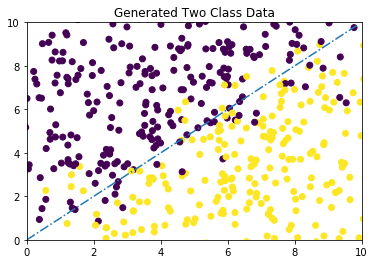

In [6]:
%matplotlib inline
bcg.plot()

# 2) y = a + bx + cx^2

In [7]:
def quadratic_f(xvec, intercept, slope_1, slope_2):
    return intercept + slope_1 * xvec + slope_2 * np.power(xvec,2)

In [8]:
QUADRATIC_F = lambda xvec: quadratic_f(xvec, 2,2,-.25)

In [9]:
bcg2 = BinaryClassGenerator(QUADRATIC_F, ERROR_F)
bcg2.generate_samples(500)

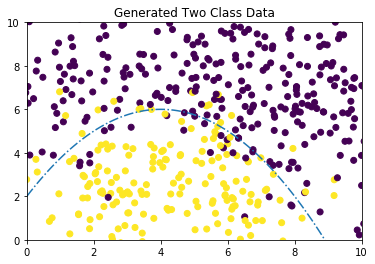

In [10]:
bcg2.plot()

# Example of extensibility:  y = a + b sin(x) 

In [11]:
bcg2 = BinaryClassGenerator(lambda x: 4 + np.sin(x) * 2, ERROR_F)
bcg2.generate_samples(700)

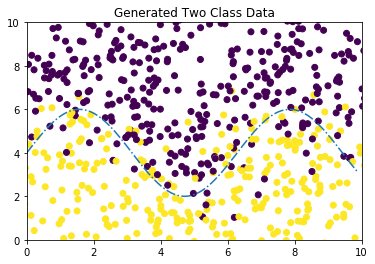

In [12]:
bcg2.plot()